## Step 1. Importing libraries

In [1129]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Step 2. Importing Data and basic exploration

In [1130]:
train_df = pd.read_csv("C:/Users/binayak/Documents/titanic/train.csv")
test_df = pd.read_csv("C:/Users/binayak/Documents/titanic/test.csv")
combine = [train_df,test_df]

**Variable-Definition	Key**
1. survival	- Survival	0 = No, 1 = Yes
2. pclass -	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
3. sex	- Sex	
4. Age	- Age in years	
5. sibsp	- # of siblings / spouses aboard the Titanic	
6. parch	- # of parents / children aboard the Titanic	
7. ticket	Ticket number	
8. fare	- Passenger fare	
9. cabin	- Cabin number	
10. embarked	- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
**Variable Notes**
1. pclass: A proxy for socio-economic status (SES)

   1st = Upper
   
   2nd = Middle
   
   3rd = Lower
   
2. age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

3. sibsp: The dataset defines family relations in this way...

   Sibling = brother, sister, stepbrother, stepsister
   
   Spouse = husband, wife (mistresses and fiancés were ignored)

4. parch: The dataset defines family relations in this way...

   Parent = mother, father
   
   Child = daughter, son, stepdaughter, stepson
   
   Some children travelled only with a nanny, therefore parch=0 for them.

In [1131]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1132]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1133]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [1134]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


**Obs 1. Age, Cabin and Embarked have Null values**

In [1135]:
train_df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
95%,846.500000,1.000000,3.000000,56.000000,3.000000,2.000000,112.079150
99%,882.100000,1.000000,3.000000,65.870000,5.000000,4.000000,249.006220


**Obs 2**
1. Total samples = 891
    
2. Survived is a categorical class with 0 0r 1 values

3. Around 38.38% survived from 891 samples 

4. About 75% of persons travelled w/o siblings or parents

5. 99% of the people were less than 65 years of age

6. About 1% of people fare were very high

In [1136]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rice, Mrs. William (Margaret Norton)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


**Obs 3.**

1. Names are unique 
2. Male is more : 577/891
3. There are 681 unique Ticket values out of 891 and CA.2343 is the ticket with highest frequency (7 times)
4. For Cabin there are 147 unique values and highest is 'G6' which occurs 4 times
5. In Embarked there are 3 categories and top category is 'S' : 644/891

## Analyzing certain features

In [1137]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**So, there are certain categorical variables which can be correlated with Survived**

In [1138]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1139]:
cat_var = train_df.columns[[2,4,6,7,10,11]]
cat_var

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked'], dtype='object')

In [1140]:
for col in cat_var:
    print(train_df[[col,'Survived']].groupby([col], as_index=False).mean().sort_values(by='Survived', ascending=False))
    print(' ')

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
 
      Sex  Survived
0  female  0.742038
1    male  0.188908
 
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
 
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
 
       Cabin  Survived
73   C62 C64       1.0
97       D21       1.0
94       D17       1.0
95       D19       1.0
60      C148       1.0
..       ...       ...
67       C46       0.0
64       C30       0.0
59      C128       0.0
56      C124       0.0
146        T       0.0

[147 rows x 2 columns]
 
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
 


In [1141]:
for col in cat_var:
    print(train_df[col].value_counts())
    print()

3    491
1    216
2    184
Name: Pclass, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

C23 C25 C27    4
B96 B98        4
G6             4
C22 C26        3
D              3
              ..
C95            1
C87            1
C46            1
D11            1
A20            1
Name: Cabin, Length: 147, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64



**Obs 4.** 
1. Pclass 1 has high Survival rate and so there can be a correlation between Pclass and Survived.
2. Pclass 3 had the most passengers but most of them did not survive. 
3. Females have a much higher survival rate than the males. However the males were more in number than the females. 
4. Some features of SibSp(like 5,8) and Parch(4,6) do not any Survival
5. Both SibSp and Parch had more number of people with category 0 but most of them did not survive. 
6. Embarked 'C' has more than 50% survival rate.
7. More passengers were there in Embarked category 'S' but a low percentage of people survived. 

In [1142]:
train_df_corr = train_df.corr()
train_df_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [1143]:
train_df_corr.style.background_gradient(cmap='YlOrRd')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


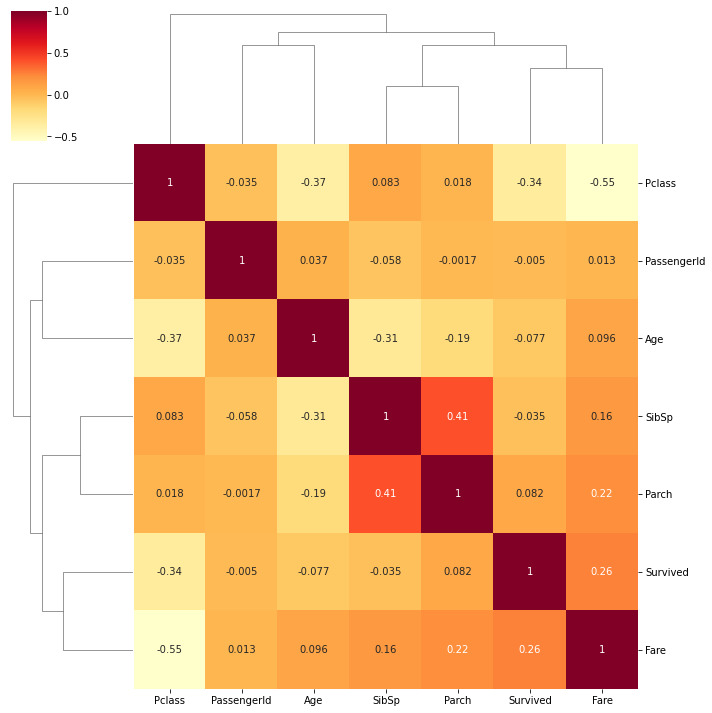

In [1144]:
sns.clustermap(train_df_corr, figsize=(10,10), cmap='YlOrRd', annot=True )

G:\anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


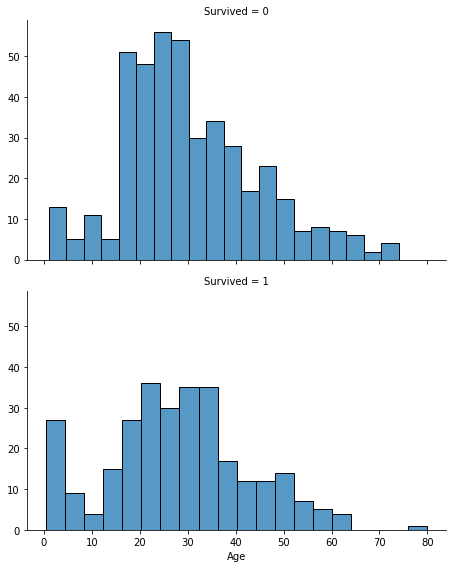

In [1145]:
g = sns.FacetGrid(train_df, row='Survived', size=4, aspect=1.6)
g.map(sns.histplot,'Age',bins=20)

In [1146]:
age_groups = pd.cut(train_df["Age"], bins=20, precision=0)
train_df.groupby(age_groups)["Age"].count()

Age
(0.0, 4.0]      40
(4.0, 8.0]      14
(8.0, 12.0]     15
(12.0, 16.0]    31
(16.0, 20.0]    79
(20.0, 24.0]    98
(24.0, 28.0]    85
(28.0, 32.0]    84
(32.0, 36.0]    73
(36.0, 40.0]    45
(40.0, 44.0]    35
(44.0, 48.0]    35
(48.0, 52.0]    29
(52.0, 56.0]    16
(56.0, 60.0]    13
(60.0, 64.0]    11
(64.0, 68.0]     4
(68.0, 72.0]     5
(72.0, 76.0]     1
(76.0, 80.0]     1
Name: Age, dtype: int64

In [1147]:
train_df.groupby(age_groups)['Survived'].mean()

Age
(0.0, 4.0]      0.675000
(4.0, 8.0]      0.642857
(8.0, 12.0]     0.266667
(12.0, 16.0]    0.483871
(16.0, 20.0]    0.341772
(20.0, 24.0]    0.367347
(24.0, 28.0]    0.352941
(28.0, 32.0]    0.416667
(32.0, 36.0]    0.479452
(36.0, 40.0]    0.377778
(40.0, 44.0]    0.342857
(44.0, 48.0]    0.342857
(48.0, 52.0]    0.482759
(52.0, 56.0]    0.437500
(56.0, 60.0]    0.384615
(60.0, 64.0]    0.363636
(64.0, 68.0]    0.000000
(68.0, 72.0]    0.000000
(72.0, 76.0]    0.000000
(76.0, 80.0]    1.000000
Name: Survived, dtype: float64

**Obs.**
1. More than 60% of the persons between 0-8 years of age survived. i.e. the survival rate of child is high.
2. Very less survival rate between 8 to 12
3. between 16 - 32 years of age the survival rate is also low.
4. Old age people survived. 

G:\anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


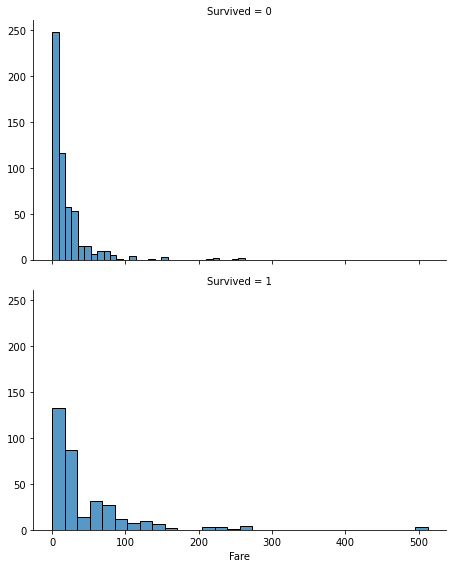

In [1148]:
g = sns.FacetGrid(train_df, row='Survived', size=4, aspect=1.6)
g.map(sns.histplot,'Fare',bins=30)

In [1149]:
fare_groups = pd.cut(train_df['Fare'], bins=30,precision=0)
train_df.groupby(fare_groups)['Survived'].mean()

Fare
(-1.0, 17.0]      0.266129
(17.0, 34.0]      0.455497
(34.0, 51.0]      0.311111
(51.0, 68.0]      0.688889
(68.0, 85.0]      0.562500
(85.0, 102.0]     0.923077
(102.0, 120.0]    0.636364
(120.0, 137.0]    0.909091
(137.0, 154.0]    0.666667
(154.0, 171.0]    1.000000
(171.0, 188.0]         NaN
(188.0, 205.0]         NaN
(205.0, 222.0]    0.600000
(222.0, 239.0]    0.750000
(239.0, 256.0]    0.500000
(256.0, 273.0]    0.666667
(273.0, 290.0]         NaN
(290.0, 307.0]         NaN
(307.0, 324.0]         NaN
(324.0, 342.0]         NaN
(342.0, 359.0]         NaN
(359.0, 376.0]         NaN
(376.0, 393.0]         NaN
(393.0, 410.0]         NaN
(410.0, 427.0]         NaN
(427.0, 444.0]         NaN
(444.0, 461.0]         NaN
(461.0, 478.0]         NaN
(478.0, 495.0]         NaN
(495.0, 512.0]    1.000000
Name: Survived, dtype: float64

**Obs.**
1. For low fares i.e. fares less thab 50 the survival rate is lower i.e less than 50%
2. But for higher fares the survival rate of the persons is more i.e. more than 50% . Infact for fares between the range (85,102] and (120, 137] the survival rate is more than 90% .Considering the fact that 95% of the people had fares less than 112 this shows the high rate beacuse there were very few travelling at such high fares. 

In [1150]:
cat_var

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked'], dtype='object')

In [1151]:
col = ['Pclass','SibSp','Parch','Embarked']
for var in col:
    print(train_df.groupby([var,'Sex'])[['Survived']].mean())
    print(' ')

               Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447
 
              Survived
SibSp Sex             
0     female  0.787356
      male    0.168203
1     female  0.754717
      male    0.310680
2     female  0.769231
      male    0.200000
3     female  0.363636
      male    0.000000
4     female  0.333333
      male    0.083333
5     female  0.000000
      male    0.000000
8     female  0.000000
      male    0.000000
 
              Survived
Parch Sex             
0     female  0.788660
      male    0.165289
1     female  0.766667
      male    0.327586
2     female  0.612245
      male    0.322581
3     female  0.750000
      male    0.000000
4     female  0.000000
      male    0.000000
5     female  0.250000
      male    0.000000
6     female  0.000000
 
                 Survived
Embarked Sex             
C        female  0.876712
         ma

**So females have a higher survival rate across all categories**

In [1152]:
col = ['Sex','SibSp','Parch','Pclass']
for var in col:
    print(train_df.groupby([var,'Embarked'])[['Survived']].mean())
    print(' ')

                 Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.689655
male   C         0.305263
       Q         0.073171
       S         0.174603
 
                Survived
SibSp Embarked          
0     C         0.477064
      Q         0.389831
      S         0.303653
1     C         0.679245
      Q         0.454545
      S         0.489655
2     C         0.833333
      Q         0.666667
      S         0.315789
3     S         0.250000
4     Q         0.000000
      S         0.214286
5     S         0.000000
8     S         0.000000
 
                Survived
Parch Embarked          
0     C         0.512195
      Q         0.434783
      S         0.285124
1     C         0.633333
      Q         0.000000
      S         0.560976
2     C         0.714286
      Q         0.000000
      S         0.461538
3     C         1.000000
      S         0.500000
4     S         0.000000
5     Q         0.000000
      S      

## Data Wrangling

In [1153]:
train_df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [1154]:
null_var = [var for var in train_df.columns if train_df[var].isnull().mean()>0.0]
null_var

['Age', 'Cabin', 'Embarked']

In [1155]:
for var in null_var:
    print(train_df[var].describe())
    print(' ')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
 
count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object
 
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
 


**Dropping varaibles**
1. Ticket cannot have any effect on survival rate. So, its better to drop this feature
2. Cabin has more than 70% missing values. So it is also a btter option to drop it beacuse filling the missing values with mode can lead to results which are faulty. 

In [1156]:
train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'], axis=1)

In [1157]:
train_df.columns, test_df.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Fare', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'Embarked'],
       dtype='object'))

**Convert Sex to numerical variable**

In [1158]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [1159]:
sex_map = {'male':1, 'female':0}
train_df['Sex'] = train_df['Sex'].map(sex_map)

In [1160]:
train_df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [1161]:
sex_map = {'male':1, 'female':0}
test_df['Sex'] = test_df['Sex'].map(sex_map)

In [1162]:
test_df['Sex'].value_counts()

1    266
0    152
Name: Sex, dtype: int64

**Extracting some features from existing columns**

In [1163]:
train_df['Name'][:30]

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [1164]:
index_1=train_df['Name'][0].find(',')
index_1

6

In [1165]:
index_2=train_df['Name'][0].find('.')
index_2

10

In [1166]:
train_df['Name'][0][index_1+2:10]

'Mr'

In [1167]:
Status_train=[]
for names in train_df['Name']:
    index_1 = names.find(',')
    index_2 = names.find('.')
    Status_train.append(names[index_1+2:index_2])
    
print(Status_train)

['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs', 'Mrs', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Don', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Master', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Master', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Master', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Master', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr

In [1168]:
train_df['Name'][-5:-1]

886                       Montvila, Rev. Juozas
887                Graham, Miss. Margaret Edith
888    Johnston, Miss. Catherine Helen "Carrie"
889                       Behr, Mr. Karl Howell
Name: Name, dtype: object

In [1169]:
train_df['Status']= Status_train
train_df[['Name','Status']][0:10]

,Name,Status
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
5,"Moran, Mr. James",Mr
6,"McCarthy, Mr. Timothy J",Mr
7,"Palsson, Master. Gosta Leonard",Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",Mrs


In [1170]:
train_df[['Status','Survived']].groupby('Status', as_index=False).mean()

,Status,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [1171]:
pd.crosstab(train_df['Status'], train_df['Sex'])

Sex,0,1
Status,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [1172]:
Status_test=[]
for names in test_df['Name']:
    index_1 = names.find(',')
    index_2 = names.find('.')
    Status_test.append(names[index_1+2:index_2])
    
print(Status_test)

['Mr', 'Mrs', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mrs', 'Mr', 'Master', 'Mrs', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Master', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss', 'Master', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Ms', 'Master', 'Mrs', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Col', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Re

In [1173]:
test_df['Status']=Status_test

In [1174]:
pd.crosstab(test_df['Status'], test_df['Sex'])

Sex,0,1
Status,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [1175]:
train_df['Status'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Sir               1
Jonkheer          1
Don               1
Ms                1
Lady              1
Mme               1
Capt              1
the Countess      1
Name: Status, dtype: int64

I want to use this to increase granularity i.e male and married or male and unmarried or female and marries or female and married.

Here:

Mr : married male

Mrs : married female

Master: male , not married 

Miss : Female , not married

Also, 
"Madame" (Mme) for a woman. The plural is Mesdames (Mmes). "Mademoiselle" (Mlle) is a traditional alternative for an unmarried woman.
So Mme can be replaced by Mrs and Mlle can be replaced by Miss

And Ms can be replaced by Miss

The other categories can be denoted as others 

In [1176]:
train_df['Status'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [1177]:
train_df['Status'].replace(to_replace=['Don', 'Rev', 'Dr','Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess','Jonkheer'],value='Others', inplace=True)
train_df['Status'].replace(to_replace=['Mlle','Ms'],value='Miss', inplace=True)
train_df['Status'].replace(to_replace='Mme',value='Mrs', inplace=True)


In [1178]:
train_df['Status'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [1179]:
train_df['Status'].value_counts()

Mr        517
Miss      183
Mrs       126
Master     40
Others     25
Name: Status, dtype: int64

In [1180]:
test_df['Status'].replace(to_replace=['Don', 'Rev', 'Dr','Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess','Jonkheer','Dona'],value='Others', inplace=True)
test_df['Status'].replace(to_replace=['Mlle','Ms'],value='Miss', inplace=True)
test_df['Status'].replace(to_replace='Mme',value='Mrs', inplace=True)


In [1181]:
test_df['Status'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: Status, dtype: int64

In [1182]:
train_df['Status'].isnull().mean(), test_df['Status'].isnull().mean()

(0.0, 0.0)

In [1183]:
status_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}
train_df['Status'] = train_df['Status'].map(status_map)
train_df['Status'] = train_df['Status'].fillna(0)

In [1184]:
train_df['Status'].value_counts()

1    517
2    183
3    126
4     40
5     25
Name: Status, dtype: int64

In [1185]:
status_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}
test_df['Status'] = test_df['Status'].map(status_map)
test_df['Status'] = test_df['Status'].fillna(0)

In [1186]:
test_df['Status'].value_counts()

1    240
2     79
3     72
4     21
5      6
Name: Status, dtype: int64

**For 'Status' column:
"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5**

In [1187]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [1188]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Status'],
      dtype='object')

**Categorical Feature: Embarked**

In [1189]:
train_df['Embarked'].isnull().sum()

2

In [1190]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

So, only two valus are null. It is a good option to fill these two observations with mode i.e. 'S'

In [1191]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [1192]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [1193]:
test_df['Embarked'].isnull().sum()

0

In [1194]:
embarked_map = {'S':1,'C':2,'Q':3}
train_df["Embarked"] = train_df['Embarked'].map(embarked_map)
test_df["Embarked"] = test_df['Embarked'].map(embarked_map)

In [1195]:
train_df['Embarked'].value_counts()

1    646
2    168
3     77
Name: Embarked, dtype: int64

In [1196]:
test_df['Embarked'].value_counts()

1    270
2    102
3     46
Name: Embarked, dtype: int64

**Map for 'Embarked'= {'S':1,'C':2,'Q':3}**

**Completing Numerical features**

In [1197]:
def impute_na(df,var,mean_median):
    return df[var].fillna(mean_median)

In [1198]:
median_age = train_df['Age'].median()
median_age

28.0

In [1199]:
train_df.loc[:,'Age']=impute_na(train_df,'Age',median_age)
test_df.loc[:,'Age']=impute_na(test_df,'Age',median_age)

**The mean and the median that we will use to replace the NA needs to be calculated in the train set and propagated to the test set.**

In [1200]:
train_df['Age'].isnull().sum()

0

In [1201]:
test_df['Age'].isnull().sum()

0

In [1202]:
train_df['Fare'].isnull().sum()

0

In [1203]:
test_df['Fare'].isnull().sum()

1

In [1204]:
median_fare = train_df['Fare'].median()
median_fare

14.4542

In [1205]:
test_df['Fare'] = test_df['Fare'].fillna(median_fare)

In [1206]:
test_df['Fare'].isnull().sum()

0

In [1207]:
test_df['Fare'][:10]

0     7.8292
1     7.0000
2     9.6875
3     8.6625
4    12.2875
5     9.2250
6     7.6292
7    29.0000
8     7.2292
9    24.1500
Name: Fare, dtype: float64

In [1208]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [1209]:
train_df.isnull().mean()

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
Status         0.0
dtype: float64

In [1210]:
test_df.isnull().mean()

PassengerId    0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
Status         0.0
dtype: float64

**Removing outliers if any for 'Age' and 'Fare'**

<AxesSubplot:xlabel='Age'>

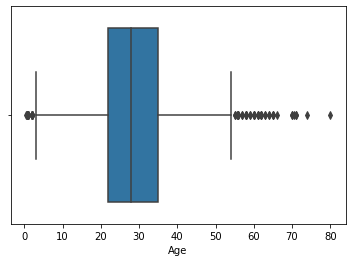

In [1211]:
sns.boxplot(x='Age', data=train_df)

<AxesSubplot:xlabel='Fare'>

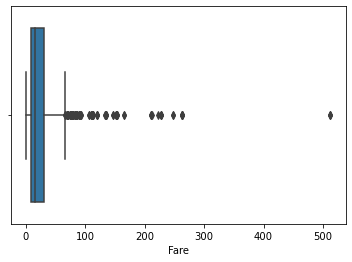

In [1212]:
sns.boxplot(x='Fare', data=train_df)

So to handle it we can either drop the outlier values or replace the outlier values using IQR(Interquartile Range Method).

IQR is calculated as the difference between the 25th and the 75th percentile of the data. The percentiles can be calculated by sorting the selecting values at specific indices. The IQR is used to identify outliers by defining limits on the sample values that are a factor k of the IQR. The common value for the factor k is the value 1.5.

In [1213]:
def removeOutlier(col):
    sorted(col)
    quant1 , quant2 = col.quantile([0.25, 0.75])
    IQR = quant2 - quant1
    lowerRange = quant1 - 1.5*IQR
    upperRange = quant2 + 1.5*IQR
    return lowerRange, upperRange

col_outlier = ['Age','Fare']

for col in train_df.columns:
    if col in col_outlier:
        lowerRange, upperRange = removeOutlier(train_df[col])
        train_df[col] = np.where(train_df[col]>upperRange,upperRange,train_df[col])
        train_df[col] = np.where(train_df[col]<lowerRange,lowerRange,train_df[col])
    else:
        continue

<AxesSubplot:xlabel='Age'>

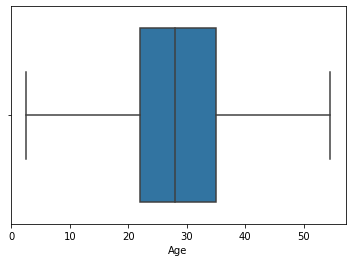

In [1214]:
sns.boxplot(x='Age', data=train_df)

<AxesSubplot:xlabel='Fare'>

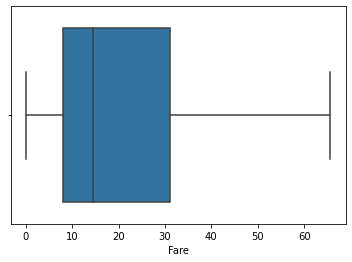

In [1215]:
sns.boxplot(x='Fare', data=train_df)

<AxesSubplot:xlabel='Age'>

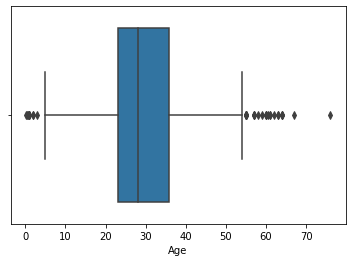

In [1216]:
sns.boxplot(x='Age', data=test_df)

<AxesSubplot:xlabel='Fare'>

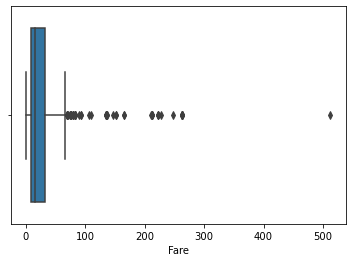

In [1217]:
sns.boxplot(x='Fare', data=test_df)

In [1218]:
def removeOutlier(col):
    sorted(col)
    quant1 , quant2 = col.quantile([0.25, 0.75])
    IQR = quant2 - quant1
    lowerRange = quant1 - 1.5*IQR
    upperRange = quant2 + 1.5*IQR
    return lowerRange, upperRange

col_outlier = ['Age','Fare']

for col in test_df.columns:
    if col in col_outlier:
        lowerRange, upperRange = removeOutlier(train_df[col])
        test_df[col] = np.where(test_df[col]>upperRange,upperRange,test_df[col])
        test_df[col] = np.where(test_df[col]<lowerRange,lowerRange,test_df[col])
    else:
        continue

It is important to remember that the capping values MUST be derived from the train set. And then use those same values to cap the variables in the test set

<AxesSubplot:xlabel='Age'>

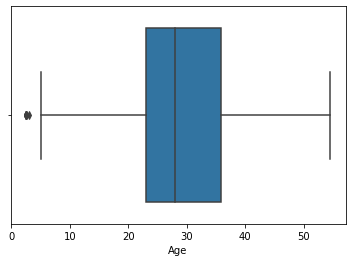

In [1219]:
sns.boxplot(x='Age', data=test_df)

<AxesSubplot:xlabel='Fare'>

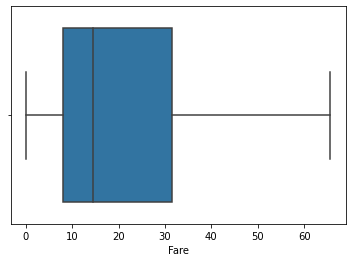

In [1220]:
sns.boxplot(x='Fare', data=test_df)

**Can I create a new feature from "Age" and "Fare"?**

In [1221]:
Age_groups = pd.cut(train_df['Age'], bins=4, precision =0)
train_df.groupby(Age_groups)['Age'].count()

Age
(2.0, 16.0]      83
(16.0, 28.0]    458
(28.0, 42.0]    208
(42.0, 54.0]    142
Name: Age, dtype: int64

In [1222]:
train_df.groupby(Age_groups)['Survived'].mean()

Age
(2.0, 16.0]     0.590361
(16.0, 28.0]    0.329694
(28.0, 42.0]    0.427885
(42.0, 54.0]    0.373239
Name: Survived, dtype: float64

In [1223]:
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 28), 'Age'] = 1
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 42), 'Age'] = 2
train_df.loc[(train_df['Age'] > 42) & (train_df['Age'] <= 54), 'Age'] = 3
train_df.loc[train_df['Age'] > 54, 'Age'] = 4

In [1224]:
train_df['Age'].value_counts()

1.0    439
2.0    223
0.0    100
3.0     87
4.0     42
Name: Age, dtype: int64

In [1225]:
test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 28), 'Age'] = 1
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 42), 'Age'] = 2
test_df.loc[(test_df['Age'] > 42) & (test_df['Age'] <= 54), 'Age'] = 3
test_df.loc[test_df['Age'] > 54, 'Age'] = 4

In [1226]:
test_df['Age'].value_counts()

1.0    226
2.0     92
3.0     41
0.0     34
4.0     25
Name: Age, dtype: int64

In [1227]:
Fare_groups = pd.cut(train_df['Fare'], bins=4, precision =0)
train_df.groupby(Fare_groups)['Fare'].count()

Fare
(-0.1, 16.0]    494
(16.0, 33.0]    188
(33.0, 49.0]     45
(49.0, 66.0]    164
Name: Fare, dtype: int64

In [1228]:
train_df.groupby(Fare_groups)['Survived'].mean()

Fare
(-0.1, 16.0]    0.263158
(16.0, 33.0]    0.462766
(33.0, 49.0]    0.311111
(49.0, 66.0]    0.676829
Name: Survived, dtype: float64

In [1229]:
train_df.loc[train_df['Fare'] <= 16, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 16) & (train_df['Fare'] <= 33), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 33) & (train_df['Fare'] <= 49), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 49) & (train_df['Fare'] <= 66), 'Fare'] = 3
train_df.loc[train_df['Fare'] > 66,'Fare'] = 4

In [1230]:
train_df['Fare'].value_counts()

0.0    485
1.0    200
3.0    164
2.0     42
Name: Fare, dtype: int64

In [1231]:
test_df.loc[test_df['Fare'] <= 16, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 16) & (test_df['Fare'] <= 33), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 33) & (test_df['Fare'] <= 49), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 49) & (test_df['Fare'] <= 66), 'Fare'] = 3
test_df.loc[test_df['Fare'] > 66,'Fare'] = 4

In [1232]:
test_df['Fare'].value_counts()

0.0    232
1.0     88
3.0     81
2.0     17
Name: Fare, dtype: int64

In [1233]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Status
0,1,0,3,1,1.0,1,0,0.0,1,1
1,2,1,1,0,2.0,1,0,3.0,2,3
2,3,1,3,0,1.0,0,0,0.0,1,2
3,4,1,1,0,2.0,1,0,3.0,1,3
4,5,0,3,1,2.0,0,0,0.0,1,1
5,6,0,3,1,1.0,0,0,0.0,3,1
6,7,0,1,1,3.0,0,0,3.0,1,1
7,8,0,3,1,0.0,3,1,1.0,1,4
8,9,1,3,0,1.0,0,2,0.0,1,3
9,10,1,2,0,0.0,1,0,1.0,2,3


**Creating some ne features**

Since SibSp means siblings and Parch means parents and children on board aith parch = 0 for those children with nanny , I define a variable family which is equal to SibSp + Parch + 1

In [1234]:
train_df['Family'] = train_df['SibSp']+train_df['Parch']+1

In [1235]:
train_df[['Family','Survived']].groupby('Family', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [1236]:
train_df['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [1237]:
train_df.loc[train_df['Family']==1,'Family']=0
train_df.loc[(train_df['Family']>1)& (train_df['Family']<=4),'Family']=1
train_df.loc[train_df['Family']>4,'Family']=2

**<u>Family Map:</u>**

**Family = 1 : 0**

**1 < Family <=4 : 1**

**Family >= 4 : 2**

In [1238]:
train_df['Family'].value_counts()

0    537
1    292
2     62
Name: Family, dtype: int64

In [1239]:
train_df[['Family','Survived']].groupby('Family', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
1,1,0.578767
0,0,0.303538
2,2,0.161290


**Now I can drop SibSp , Parch from the datset**

In [1240]:
train_df = train_df.drop(['SibSp','Parch'], axis=1)

In [1241]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Status,Family
0,1,0,3,1,1.0,0.0,1,1,1
1,2,1,1,0,2.0,3.0,2,3,1
2,3,1,3,0,1.0,0.0,1,2,0
3,4,1,1,0,2.0,3.0,1,3,1
4,5,0,3,1,2.0,0.0,1,1,0
5,6,0,3,1,1.0,0.0,3,1,0
6,7,0,1,1,3.0,3.0,1,1,0
7,8,0,3,1,0.0,1.0,1,4,2
8,9,1,3,0,1.0,0.0,1,3,1
9,10,1,2,0,0.0,1.0,2,3,1


In [1242]:
test_df['Family'] = test_df['SibSp']+test_df['Parch']+1

test_df.loc[test_df['Family']==1,'Family']=0
test_df.loc[(test_df['Family']>1)& (test_df['Family']<=4),'Family']=1
test_df.loc[test_df['Family']>4,'Family']=2

test_df['Family'].value_counts()

0    253
1    145
2     20
Name: Family, dtype: int64

In [1243]:
test_df = test_df.drop(['SibSp','Parch'], axis=1)

In [1244]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Status,Family
0,892,3,1,2.0,0.0,3,1,0
1,893,3,0,3.0,0.0,1,3,1
2,894,2,1,4.0,0.0,3,1,0
3,895,3,1,1.0,0.0,1,1,0
4,896,3,0,1.0,0.0,1,3,1


**Final Data**

In [1245]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Status,Family
0,1,0,3,1,1.0,0.0,1,1,1
1,2,1,1,0,2.0,3.0,2,3,1
2,3,1,3,0,1.0,0.0,1,2,0
3,4,1,1,0,2.0,3.0,1,3,1
4,5,0,3,1,2.0,0.0,1,1,0


In [1246]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    int64  
 7   Status       891 non-null    int64  
 8   Family       891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.7 KB


In [1247]:
col = ['Age','Fare']
train_df[col] = train_df[col].applymap(np.int64)
# if I do separately then, train_df['Age'] = train_df['Age'].apply(np.int64)
# same also goes for 'Fare'

In [1248]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int64
 5   Fare         891 non-null    int64
 6   Embarked     891 non-null    int64
 7   Status       891 non-null    int64
 8   Family       891 non-null    int64
dtypes: int64(9)
memory usage: 62.7 KB


In [1249]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Status,Family
0,1,0,3,1,1,0,1,1,1
1,2,1,1,0,2,3,2,3,1
2,3,1,3,0,1,0,1,2,0
3,4,1,1,0,2,3,1,3,1
4,5,0,3,1,2,0,1,1,0


In [1252]:
col = ['Age','Fare']
test_df[col] =test_df[col].applymap(np.int64)

In [1253]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int64
 3   Age          418 non-null    int64
 4   Fare         418 non-null    int64
 5   Embarked     418 non-null    int64
 6   Status       418 non-null    int64
 7   Family       418 non-null    int64
dtypes: int64(8)
memory usage: 26.2 KB


In [1254]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Status,Family
0,892,3,1,2,0,3,1,0
1,893,3,0,3,0,1,3,1
2,894,2,1,4,0,3,1,0
3,895,3,1,1,0,1,1,0
4,896,3,0,1,0,1,3,1


**Exporting Dataset**

In [1255]:
train_df.to_csv('train_set.csv',index=False)

In [1256]:
test_df.to_csv('test_set.csv',index=False)

In [1260]:
train_final_df = pd.read_csv("C:/Users/binayak/Documents/titanic/train_set.csv")
test_final_df = pd.read_csv("C:/Users/binayak/Documents/titanic/test_set.csv")

In [1261]:
train_final_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Status,Family
0,1,0,3,1,1,0,1,1,1
1,2,1,1,0,2,3,2,3,1
2,3,1,3,0,1,0,1,2,0
3,4,1,1,0,2,3,1,3,1
4,5,0,3,1,2,0,1,1,0


In [1262]:
test_final_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Status,Family
0,892,3,1,2,0,3,1,0
1,893,3,0,3,0,1,3,1
2,894,2,1,4,0,3,1,0
3,895,3,1,1,0,1,1,0
4,896,3,0,1,0,1,3,1


**The above two sets can be now used for modelling**